In [1]:
from Imports.DotBashers  import *
from Imports.Def_md2mc   import *
from Imports.Def_DFA     import addtosigma_dfa, totalize_dfa

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



 # This is now a universal markdown!

This is now a markdown that supports all machines!

# A Frequently Committee Mistake

I am expecting a frequent mistake to be committed in PDA specifications. So I list this mistake and how to avoid it, first.

"""
THE FOLLOWING PDA syntax is in error. The stack part should be a single string
WITHOUT any blanks

brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 
 M : '', S  ; (S)   -> M    !! <--- THIS IS RIGHT
 
 M : '', S  ; ( S ) -> M    !! <--- THIS IS WRONG
 
 M : '', S  ; SS   -> M     !! <--- THIS IS RIGHT
 
 M : '', S  ; S S  -> M     !! <--- THIS IS WRONG
 
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda, FuseEdges=True)
"""


"""

HERE IS ANOTHER MISTAKE!

THE FOLLOWING PDA syntax is in error. The stack part should be a single string
WITHOUT any blanks

brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 
 M : '', S  ; (S)   -> M         
 
 M : '', S  ; SS  -> M       
 
 M : '', S  ; 'e'     -> M  # <--- THIS IS WRONG: no need to quote e
 
 M : (,  '(' ; ''    -> M   # <--- THIS IS WRONG: no quotes around (
 
 M : ')',  )  ; ''    -> M  # <--- THIS IS WRONG: no quotes around )
 
 M : e,  e  ; ''    -> M
 
 M : '', '#'  ; ''    -> F''') # <--- THIS IS WRONG: no quotes around #
 
dotObj_pda(brpda, FuseEdges=True)


"""

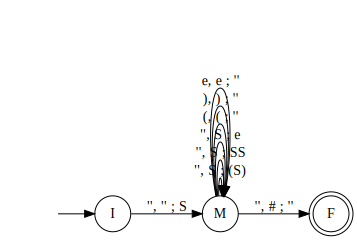

In [52]:
brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda) # <-- Ugh, without FuseEdges as a parameter, the drawing is a mess...

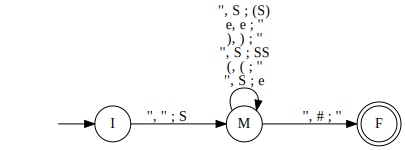

In [53]:
brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda, FuseEdges=True)  # <-- what a difference FuseEdges makes !!

# We begin with several examples

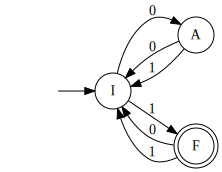

In [2]:
ev0end1 = md2mc('''
DFA
I : 0 -> A
A : 0 | 1 -> I
I : 1 -> F
F : 0 | 1 -> I
''')
dotObj_dfa(ev0end1)

In [3]:
ev0end1plus = addtosigma_dfa(ev0end1, {'2'})
ev0end1plus

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1', '2'},
 'q0': 'I'}

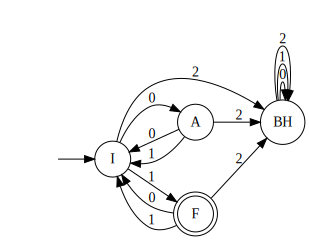

In [54]:
dotObj_dfa_w_bh(totalize_dfa(ev0end1plus))

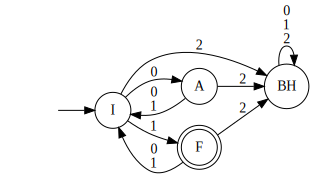

In [55]:
dotObj_dfa_w_bh(totalize_dfa(ev0end1plus), FuseEdges=True)

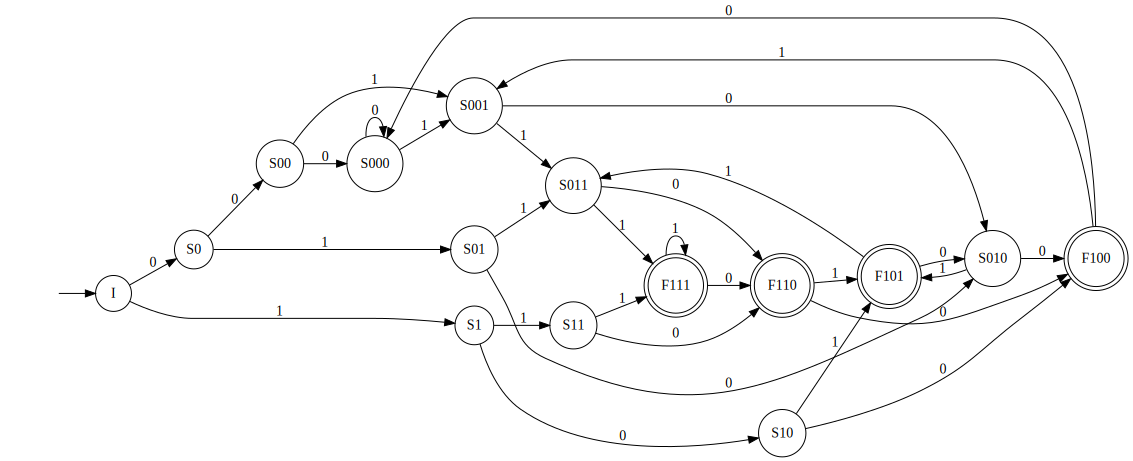

In [5]:
third1dfa=md2mc(src="File", fname="dfafiles/thirdlastis1.dfa")
dotObj_dfa(third1dfa)

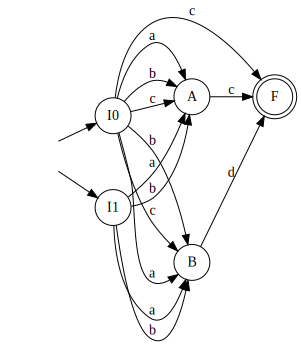

In [6]:
# An NFA with multiple initial states
nfaMultiQ0 = md2mc('''
NFA
I0 : a | b | c -> A, B
I0 : c -> F
I1 : a | b -> A, B
A  : c -> F
B  : d -> F
''')
dotObj_nfa(nfaMultiQ0)

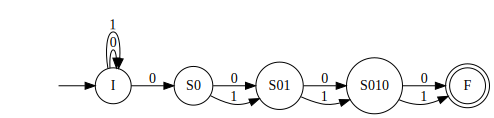

In [7]:
nfa_ends0101 = md2mc(src="File", fname="nfafiles/endsin0101.nfa")
dotObj_nfa(nfa_ends0101)

In [8]:
# generates syntax error correctly: md2mc(src="File", fname="pdafiles/erroneous3.pda")

# Code for DFA Markdown

In [9]:
nfa_ends0101 = md2mc(src="File", fname="nfafiles/endsin0101.nfa")

In [10]:
nfa_ends0101

{'Delta': {('I', '0'): {'I', 'S0'},
  ('I', '1'): {'I'},
  ('S0', '0'): {'S01'},
  ('S0', '1'): {'S01'},
  ('S01', '0'): {'S010'},
  ('S01', '1'): {'S010'},
  ('S010', '0'): {'F'},
  ('S010', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S01', 'S010'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

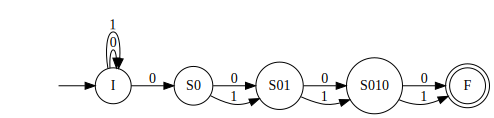

In [11]:
dotObj_nfa(nfa_ends0101)

__What's needed now : More testing, more use!__

In [12]:
last1dfa=md2mc(''' 
NFA
I : 0 -> I
I : 1 -> F
F : 0 -> I
F : 1 -> F
''')


In [13]:
second1dfa=md2mc(src="File", fname="dfafiles/secondlastis1.dfa")

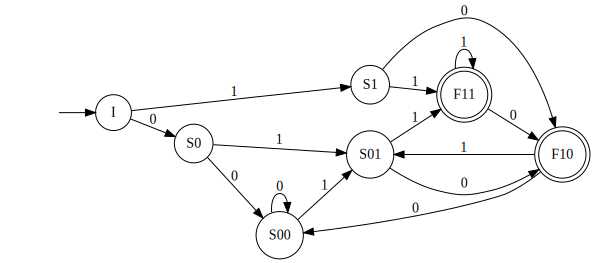

In [14]:
second1dfa_do = dotObj_dfa(second1dfa)
second1dfa_do

In [15]:
second1dfa_do.source

'// do_St7\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS0 [label=S0 peripheries=1 shape=circle]\n\t\tS00 [label=S00 peripheries=1 shape=circle]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tS1 [label=S1 peripheries=1 shape=circle]\n\t\tS01 [label=S01 peripheries=1 shape=circle]\n\t\tF10 [label=F10 peripheries=2 shape=circle]\n\t\tF11 [label=F11 peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> S0 [label=0]\n\t\t\tI -> S1 [label=1]\n\t\t\tS0 -> S00 [label=0]\n\t\t\tS0 -> S01 [label=1]\n\t\t\tS1 -> F10 [label=0]\n\t\t\tS1 -> F11 [label=1]\n\t\t\tS00 -> S00 [label=0]\n\t\t\tS00 -> S01 [label=1]\n\t\t\tS01 -> F10 [label=0]\n\t\t\tS01 -> F11 [label=1]\n\t\t\tF10 -> S00 [label=0]\n\t\t\tF10 -> S01 [label=1]\n\t\t\tF11 -> F10 [label=0]\n\t\t\tF11 -> F11 [label=1]\n}'

In [16]:
third1dfa=md2mc(src="File", fname="dfafiles/thirdlastis1.dfa")

In [17]:
third1dfa

{'Delta': {('F100', '0'): 'S000',
  ('F100', '1'): 'S001',
  ('F101', '0'): 'S010',
  ('F101', '1'): 'S011',
  ('F110', '0'): 'F100',
  ('F110', '1'): 'F101',
  ('F111', '0'): 'F110',
  ('F111', '1'): 'F111',
  ('I', '0'): 'S0',
  ('I', '1'): 'S1',
  ('S0', '0'): 'S00',
  ('S0', '1'): 'S01',
  ('S00', '0'): 'S000',
  ('S00', '1'): 'S001',
  ('S000', '0'): 'S000',
  ('S000', '1'): 'S001',
  ('S001', '0'): 'S010',
  ('S001', '1'): 'S011',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'S011',
  ('S010', '0'): 'F100',
  ('S010', '1'): 'F101',
  ('S011', '0'): 'F110',
  ('S011', '1'): 'F111',
  ('S1', '0'): 'S10',
  ('S1', '1'): 'S11',
  ('S10', '0'): 'F100',
  ('S10', '1'): 'F101',
  ('S11', '0'): 'F110',
  ('S11', '1'): 'F111'},
 'F': {'F100', 'F101', 'F110', 'F111'},
 'Q': {'F100',
  'F101',
  'F110',
  'F111',
  'I',
  'S0',
  'S00',
  'S000',
  'S001',
  'S01',
  'S010',
  'S011',
  'S1',
  'S10',
  'S11'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [18]:
third1dfa_do  = dotObj_dfa(third1dfa)

In [19]:
third1dfa_do.source

'// do_St8\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS000 [label=S000 peripheries=1 shape=circle]\n\t\tS011 [label=S011 peripheries=1 shape=circle]\n\t\tS001 [label=S001 peripheries=1 shape=circle]\n\t\tS0 [label=S0 peripheries=1 shape=circle]\n\t\tS00 [label=S00 peripheries=1 shape=circle]\n\t\tS11 [label=S11 peripheries=1 shape=circle]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tS01 [label=S01 peripheries=1 shape=circle]\n\t\tS1 [label=S1 peripheries=1 shape=circle]\n\t\tS010 [label=S010 peripheries=1 shape=circle]\n\t\tS10 [label=S10 peripheries=1 shape=circle]\n\t\tF100 [label=F100 peripheries=2 shape=circle]\n\t\tF111 [label=F111 peripheries=2 shape=circle]\n\t\tF101 [label=F101 peripheries=2 shape=circle]\n\t\tF110 [label=F110 peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> S0 [label=0]\n\t\t\tI -> S1 [label=1]\n\t\t\tS0 -> S00 [label=0]\n\t\t\tS0 -> S01 [label=1]\n\t\t\tS1 -> S10 [label=0]\n\t\t\tS1 -> S11 [label=1]\n\t\t\tS00 -> 

In [20]:
pdasip=md2mc(src="File", fname="pdafiles/f27sip.pda")

In [21]:
pdasip

{'Delta': {('fq4', 'c', ''): {('fq4', '')},
  ('iq1', '', ''): {('q2', '$')},
  ('q2', '', ''): {('q3', ''), ('q5', '')},
  ('q2', 'a', ''): {('q2', 'a')},
  ('q3', '', '$'): {('fq4', '')},
  ('q3', 'b', 'a'): {('q3', '')},
  ('q5', '', ''): {('q6', '')},
  ('q5', 'b', ''): {('q5', '')},
  ('q6', '', '$'): {('fq7', '')},
  ('q6', 'c', 'a'): {('q6', '')}},
 'F': {'fq4', 'fq7'},
 'Gamma': {'#', '$', 'a', 'b', 'c'},
 'Q': {'fq4', 'fq7', 'iq1', 'q2', 'q3', 'q5', 'q6'},
 'Sigma': {'a', 'b', 'c'},
 'q0': 'iq1',
 'z0': '#'}

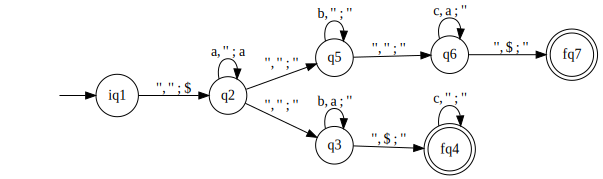

In [22]:
dotObj_pda(pdasip)

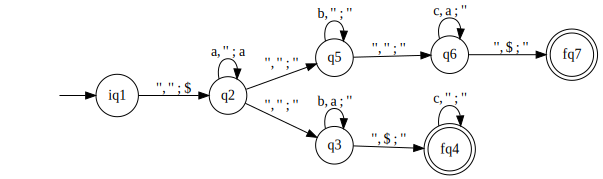

In [23]:
dotObj_pda(pdasip, True)

In [24]:
wwndtm=md2mc(src="File", fname="tmfiles/wwndtm.tm")

In [25]:
wwndtm

{'B': '.',
 'Delta': {('Iq0', '.'): {('Fq1', '.', 'R')},
  ('Iq0', '0'): {('q14', '0', 'S')},
  ('Iq0', '1'): {('q14', '1', 'S')},
  ('q10', '.'): {('q8', '.', 'L')},
  ('q10', '0'): {('q8', 'X', 'L')},
  ('q10', '1'): {('q8', 'Y', 'L')},
  ('q11', '.'): {('q9', '.', 'L')},
  ('q11', '0'): {('q9', 'X', 'L')},
  ('q11', '1'): {('q9', 'Y', 'L')},
  ('q12', '.'): {('Fq13', '.', 'R')},
  ('q12', '2'): {('q12', '2', 'R')},
  ('q12', '3'): {('q12', '3', 'R')},
  ('q14', '0'): {('q14', '0', 'R'), ('q2', 'X', 'L')},
  ('q14', '1'): {('q14', '1', 'R'), ('q2', 'Y', 'L')},
  ('q2', '.'): {('q3', '.', 'R')},
  ('q2', '0'): {('q2', '0', 'L')},
  ('q2', '1'): {('q2', '1', 'L')},
  ('q3', '0'): {('q4', 'P', 'R')},
  ('q3', '1'): {('q5', 'Q', 'R')},
  ('q3', '2'): {('q12', '2', 'R')},
  ('q3', '3'): {('q12', '3', 'R')},
  ('q3', 'X'): {('q6', 'X', 'R')},
  ('q3', 'Y'): {('q7', 'Y', 'R')},
  ('q4', '0'): {('q4', '0', 'R')},
  ('q4', '1'): {('q4', '1', 'R')},
  ('q4', '2'): {('q4', '2', 'R')},
  ('q4', 

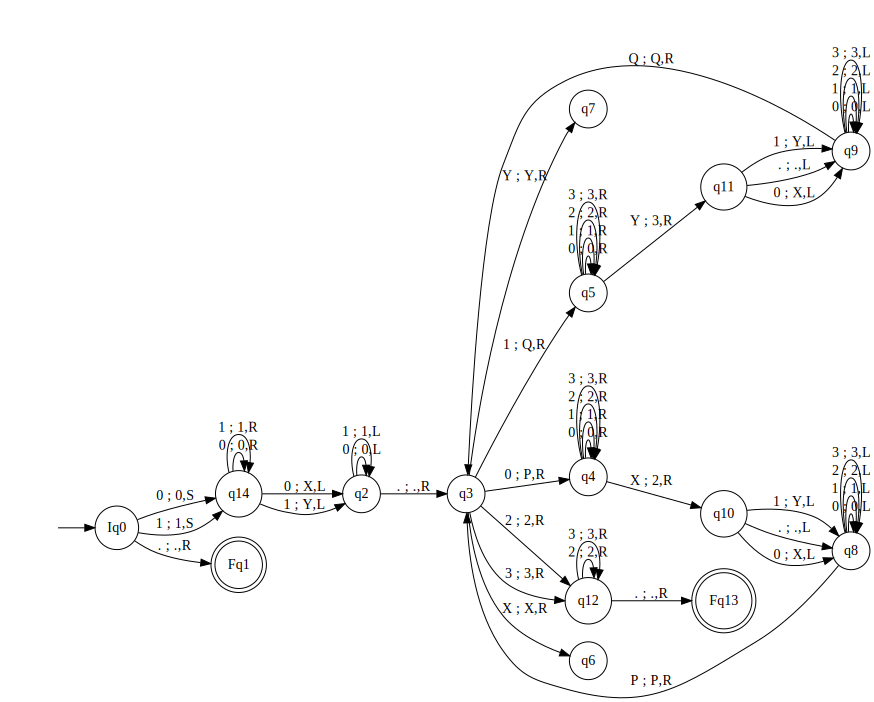

In [26]:
dotObj_tm(wwndtm)

In [27]:
wpwtm = '''
TM 
!!---------------------------------------------------------------------------
!! This is a DTM for recognizing strings of the form w#w where w is in {0,1}*
!! The presence of the "#" serves as the midpoint-marker, thus allowing the
!! TM to deterministically match around it.
!! 
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Iq0     : 0  ; X  , R  -> q1      !! All 0s are converted to X, and matching
	       	       	  	  !! 0s are then sought to the right of the #

Iq0     : 0  ; Y  , R  -> q7      !! All 1s are converted to Y, and matching
	       	       	  	  !! 1s are then sought to the right of the #				  
				  
Iq0     : #  ; #  , R  -> q5      !! If we see # rightaway, we are in the
	       	       	  	  !! situation of having to match eps # eps

q1      : 0 ; 0,R | 1 ; 1,R -> q1 !! In q1, skip over the remaining 0s and 1s

q1      : #  ; #  , R  -> q2      !! But upon seeing a #, look for a matching
	       	       	  	  !! 0 (since we are in q2, we know this).

q2      : X ; X,R | Y ; Y,R -> q2 !! All X and Y are "past stuff" to skip over

q2      : 0  ; X  , L  -> q3      !! When we find a matching 0, turn that to
	       	       	  	  !! an X, and sweep left to do the next pass
				  
q3      : X ; X,L | Y ; Y,L -> q3 !! In q3, we move over all past X, Y

q3      : #  ; #  , L  -> q4      !! but when we reach the middle marker, we
	       	       	  	  !! know that the next action is to seek the
				  !! next unprocessed 0 or 1
				  
q4      : 0 ; 0,L | 1 ; 1,L -> q4 !! In q4, wait till we hit the leftmost 0/1

q4      : X ; X,R | Y ; Y,R -> Iq0 !! When we hit an X or Y, we know that we've
	      	      	       	  !! found the leftmost 0/1. Another pass begins.

q5	: X ; X,R | Y ; Y,R -> q5 !! In q5, we skip over X and Y (an equal number
	      	      	       	  !! of X and Y lie to the left of the #)
				  
q5      : .  ; .  , R  -> Fq6	  !! .. and we accept when we see a blank (.)

q7      : 0 ; 0,R | 1 ; 1,R -> q7 !! q7 is similar to q1

q7      : #  ; #  , R  -> q8      !! and q8 is similar to q2

q8      : X ; X,R | Y ; Y,R -> q8 

q8      : 0  ; X  , L  -> q9      !! and q9 is similar to q3

q9      : X ; X,L | Y ; Y,L -> q9 !! In q9, we move over all past X, Y

q9      : #  ; #  , L  -> q10     !! and q10 is similar to q4

q10      : 0 ; 0,L | 1 ; 1,L -> q10 !! In q10, wait till we hit the leftmost 0/1

q10      : X ; X,R | Y ; Y,R -> Iq0 !! When we hit an X or Y, we know that we've
	      	      	       	   !! found the leftmost 0/1. Another pass begins.

!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------
'''

In [28]:
wpwmd = md2mc(wpwtm)

In [29]:
do_wpwmd = dotObj_tm(wpwmd)

In [30]:
#do_wpwmd.source

In [31]:
wwndtm_do=dotObj_tm(wwndtm)

In [32]:
#wwndtm_do.source

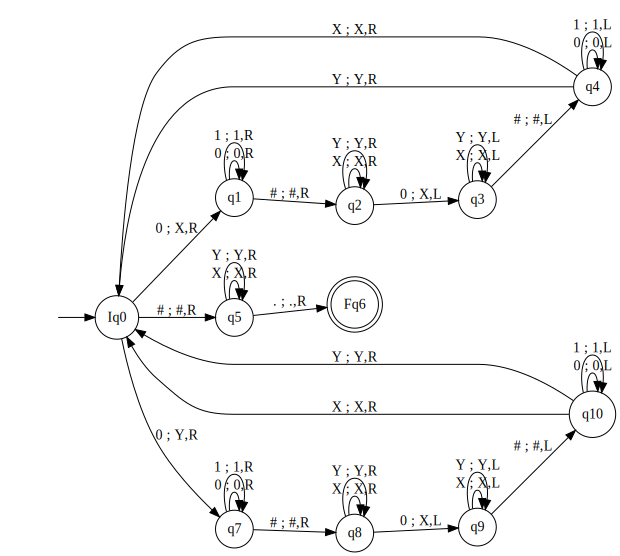

In [33]:
do_wpwmd

In [34]:
ev0end1 = md2mc('''
DFA
I : 0 -> A
I : 1 -> F
A : 0 | 1 -> I
F : 0 | 1 -> I
''')

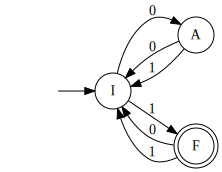

In [35]:
dotObj_dfa(ev0end1)

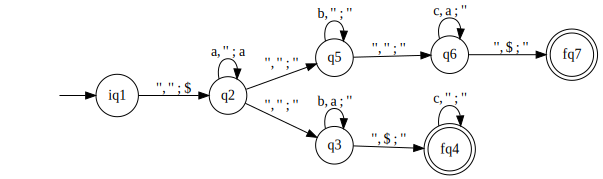

In [36]:
pedpda = md2mc(src="File",fname="pdafiles/f27sip.pda")
dotObj_pda(pedpda)

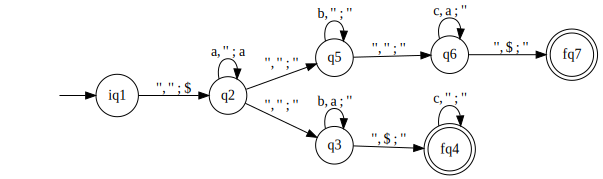

In [37]:
dotObj_pda(pedpda)

In [38]:
pedpda

{'Delta': {('fq4', 'c', ''): {('fq4', '')},
  ('iq1', '', ''): {('q2', '$')},
  ('q2', '', ''): {('q3', ''), ('q5', '')},
  ('q2', 'a', ''): {('q2', 'a')},
  ('q3', '', '$'): {('fq4', '')},
  ('q3', 'b', 'a'): {('q3', '')},
  ('q5', '', ''): {('q6', '')},
  ('q5', 'b', ''): {('q5', '')},
  ('q6', '', '$'): {('fq7', '')},
  ('q6', 'c', 'a'): {('q6', '')}},
 'F': {'fq4', 'fq7'},
 'Gamma': {'#', '$', 'a', 'b', 'c'},
 'Q': {'fq4', 'fq7', 'iq1', 'q2', 'q3', 'q5', 'q6'},
 'Sigma': {'a', 'b', 'c'},
 'q0': 'iq1',
 'z0': '#'}

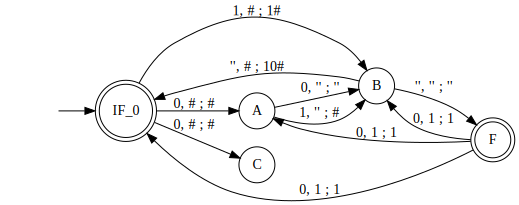

In [39]:
pedpda = md2mc(src="File", fname="pdafiles/pedagogical2.pda")
dotObj_pda(pedpda)

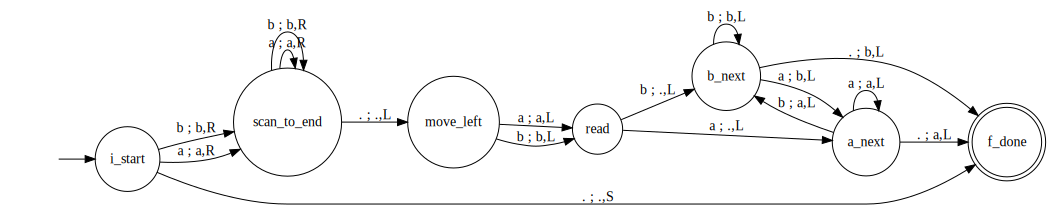

In [40]:
dotObj_tm(md2mc(src="File", fname="tmfiles/shift_left_tm.tm"))

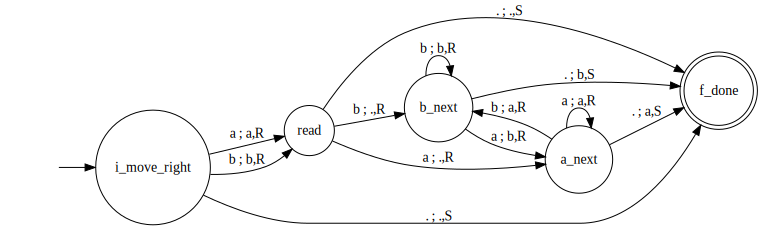

In [41]:
dotObj_tm(md2mc(src="File", fname="tmfiles/shift_right_tm.tm"))

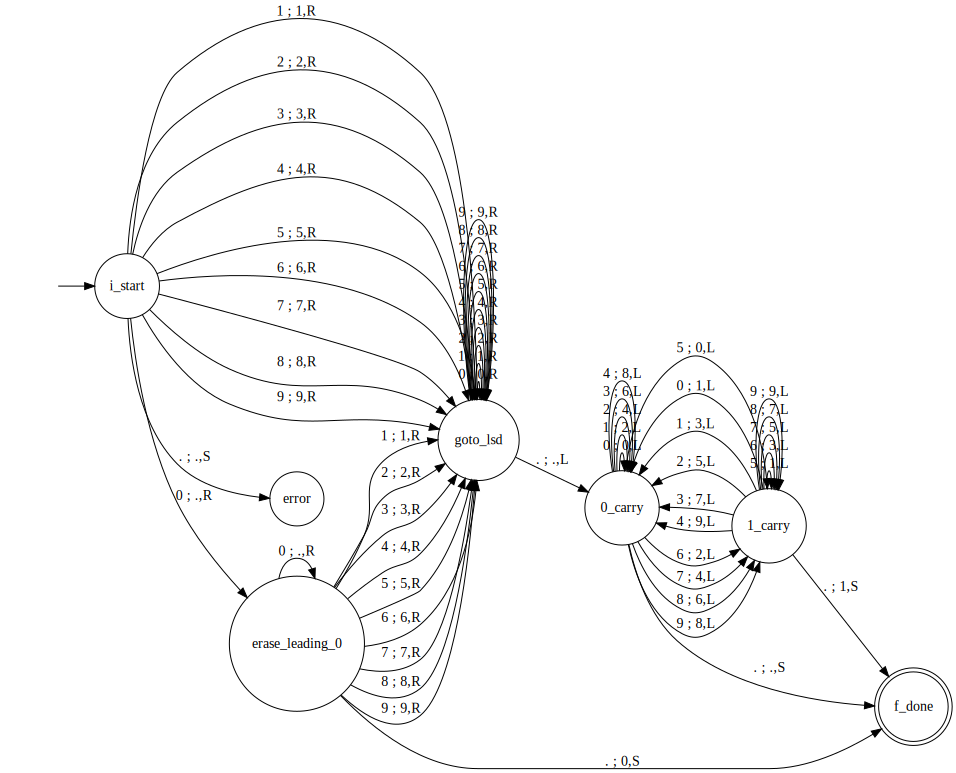

In [44]:
dotObj_tm(md2mc(src="File", fname="tmfiles/decimal_double_tm.tm"))

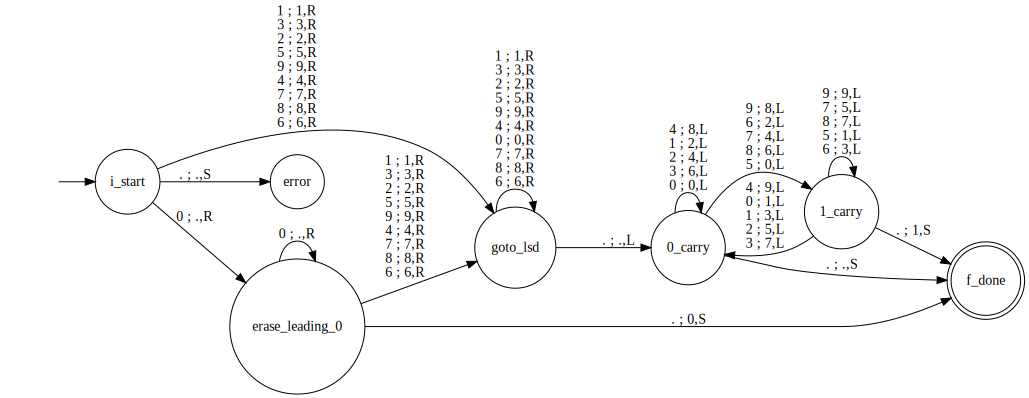

In [45]:
dotObj_tm(md2mc(src="File", fname="tmfiles/decimal_double_tm.tm"), FuseEdges=True)

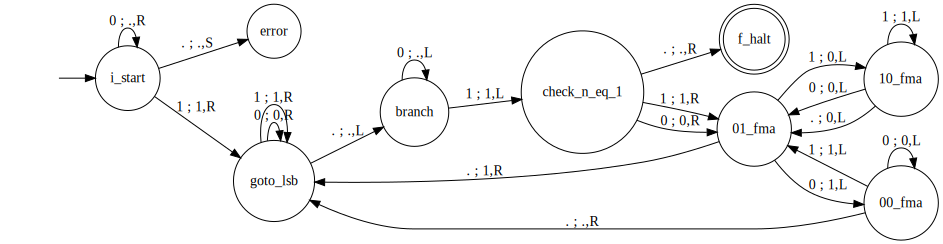

In [46]:
dotObj_tm(md2mc(src="File", fname="tmfiles/collatz_tm.tm"))

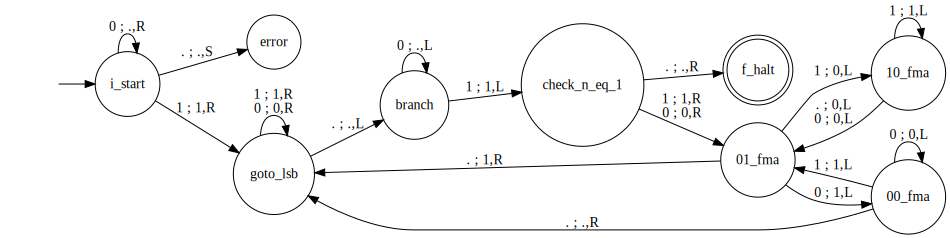

In [47]:
dotObj_tm(md2mc(src="File", fname="tmfiles/collatz_tm.tm"), FuseEdges = True)

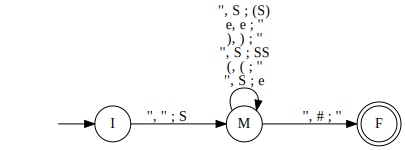

In [48]:
brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda, FuseEdges=True)